In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_2653624/3777623105.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_communities))


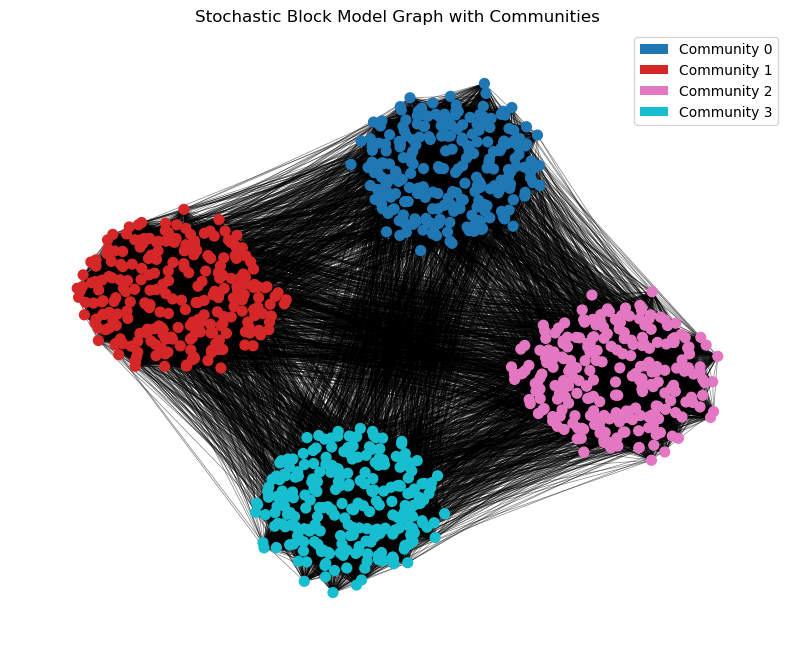

In [4]:
np.random.seed(42)

# Define the sizes of each block (community)
sizes = [250, 250, 250, 250]  # Adjust sizes as needed

# Define the connection probabilities between blocks
p_intra = 0.4   # Probability of intra-community connections
p_inter = 0.01  # Probability of inter-community connections

# Create the probability matrix for the SBM
probs = [[p_intra if i == j else p_inter for j in range(len(sizes))] for i in range(len(sizes))]

# Generate the SBM graph
G = nx.stochastic_block_model(sizes, probs, seed=42)

# Relabel nodes to ensure IDs start from 0 and are consecutive integers
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Generate community labels based on the sizes
community_labels = []
for idx, size in enumerate(sizes):
    community_labels.extend([idx] * size)
community_labels = {node: label for node, label in enumerate(community_labels)}

# Assign community labels as node attributes
nx.set_node_attributes(G, community_labels, 'community')

# Choose a color for each community
unique_communities = set(community_labels.values())
colors = plt.cm.get_cmap('tab10', len(unique_communities))

# Create a color map for nodes
node_colors = [colors(community_labels[node]) for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # You can choose a different layout if desired

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.5)

# Remove axes
plt.axis('off')
plt.title('Stochastic Block Model Graph with Communities')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors(i), label=f'Community {i}') for i in unique_communities]
plt.legend(handles=legend_elements, loc='best')

plt.show()

In [33]:
nx.write_edgelist(G,"sbm_edgelist.txt")

Plotting the hyperbolic embedding gotten from mercator

In [5]:
import numpy as np

# Load inferred coordinates from your file
coord_inferred = 'sbm_edgelist.inf_coord'  # Adjust this path if necessary
data = np.loadtxt(coord_inferred, usecols=[0, 1, 2, 3], dtype={'names': ('name', 'kappa', 'theta', 'radius'), 'formats': ('i', 'f4', 'f4', 'f4')})


In [6]:
data

array([(  0,  90.835 , 4.18545e+00, 5.79005),
       (  1,  99.3589, 3.96146e+00, 5.61066),
       (  2, 105.514 , 4.66000e+00, 5.49046),
       (  3,  64.2771, 4.47644e+00, 6.48173),
       (  4,  94.4534, 4.04605e+00, 5.71193),
       (  5, 121.286 , 3.86611e+00, 5.21184),
       (  6,  74.4122, 4.37999e+00, 6.1889 ),
       (  7, 106.075 , 3.90077e+00, 5.47984),
       (  8, 107.332 , 3.89305e+00, 5.45629),
       (  9, 123.707 , 4.74338e+00, 5.17231),
       ( 10,  92.8899, 4.55407e+00, 5.74531),
       ( 11, 104.343 , 4.00991e+00, 5.51277),
       ( 12,  88.3248, 4.44282e+00, 5.8461 ),
       ( 13,  90.6866, 4.16987e+00, 5.79332),
       ( 14, 101.471 , 4.64158e+00, 5.5686 ),
       ( 15,  88.3963, 4.52861e+00, 5.84448),
       ( 16, 128.954 , 3.79860e+00, 5.08923),
       ( 17, 117.799 , 3.94397e+00, 5.27018),
       ( 18, 104.158 , 4.02119e+00, 5.51632),
       ( 19, 131.55  , 4.67548e+00, 5.04937),
       ( 20,  74.7048, 4.17013e+00, 6.18105),
       ( 21,  80.8152, 4.10267e+00

/tmp/ipykernel_2653624/275994917.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_communities))


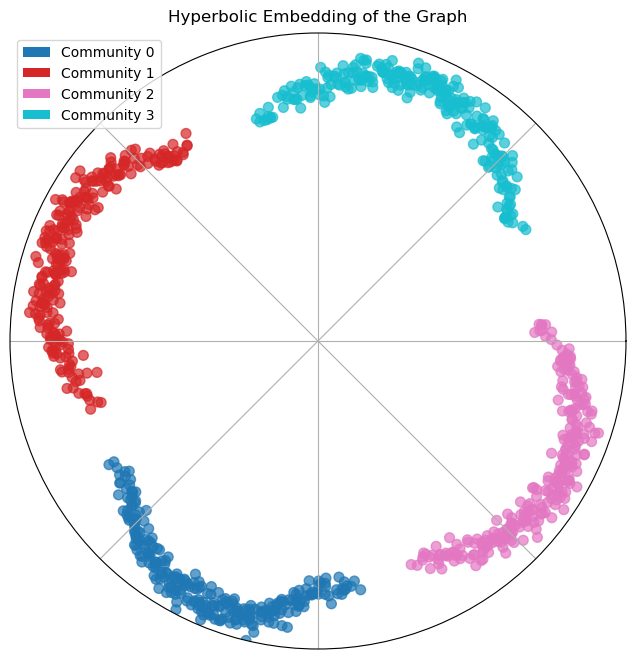

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_hyperbolic_disk(data, community_labels):
    # Extract theta and radius from the data
    theta = data['theta']
    radius = data['radius']
    
    # Get unique communities from community_labels
    unique_communities = set(community_labels.values())
    
    # Create a colormap for the communities
    colors = plt.cm.get_cmap('tab10', len(unique_communities))

    # Create a color mapping for each node based on its community
    node_colors = [colors(community_labels[node]) for node in range(len(theta))]

    # Create a polar plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
    
    # Plot vertices in the hyperbolic disk, colored by community
    scatter = ax.scatter(theta, radius, c=node_colors, alpha=0.7, s=50, label='Vertices')

    # Customize the plot (remove radial labels, etc.)
    ax.set_rticks([])  # Remove radial ticks
    ax.set_xticklabels([])  # Remove angular ticks
    ax.set_ylim(0, np.max(radius))  # Limit radial axis
    
    # Add a title
    ax.set_title("Hyperbolic Embedding of the Graph", va='bottom')
    
    # Create legend elements for each community
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=colors(i), label=f'Community {i}') for i in unique_communities]
    ax.legend(handles=legend_elements, loc='best')

    # Show the plot
    plt.show()


# Call the function to plot the hyperbolic disk
plot_hyperbolic_disk(data, community_labels)


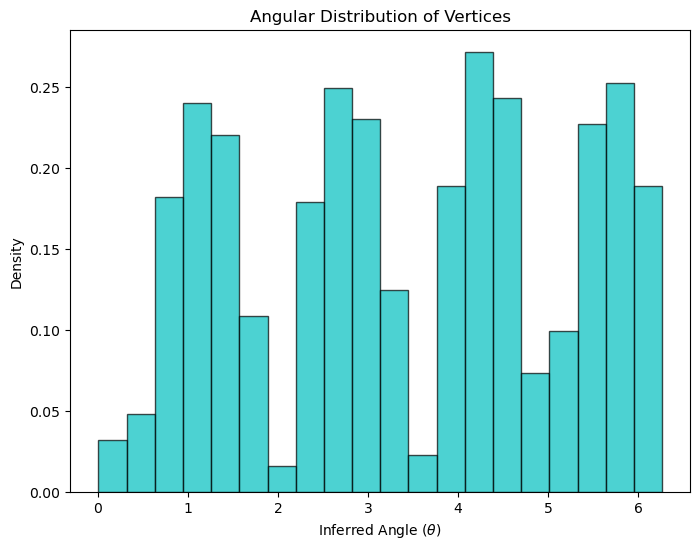

In [8]:
def plot_theta_distribution(data):
    # Extract theta values
    theta = data['theta']
    
    # Create a histogram of the theta values
    plt.figure(figsize=(8, 6))
    plt.hist(theta, bins=20, density=True, color='c', edgecolor='k', alpha=0.7)
    
    # Customize plot
    plt.xlabel(r"Inferred Angle $(\theta)$")
    plt.ylabel("Density")
    plt.title("Angular Distribution of Vertices")
    
    plt.show()

# Call the function to plot the angular distribution
plot_theta_distribution(data)


#### Great, now we plot the embeddings gotten from node2vec for this network

In [9]:
import embcom
emb_params = {
                "method": "node2vec",
                "window_length": 10,
                "walk_length": 80,
                "num_walks": 10,
                "dim" : 64,
                }
model = embcom.embeddings.Node2Vec(window_length = emb_params['window_length'],
                           walk_length=emb_params['walk_length'],
                           num_walks=emb_params['num_walks'])
#model = embcom.embeddings.LaplacianEigenMap()
model.fit(G)
emb = model.transform(dim=emb_params['dim'])


In [10]:
np.shape(emb)

(1000, 64)

2024-10-03 14:52:16.362217: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-03 14:52:17.399628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 14:52:17.399728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 14:52:17.582112: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-03 14:52:17.953639: I tensorflow/core/platform/cpu_feature_guar

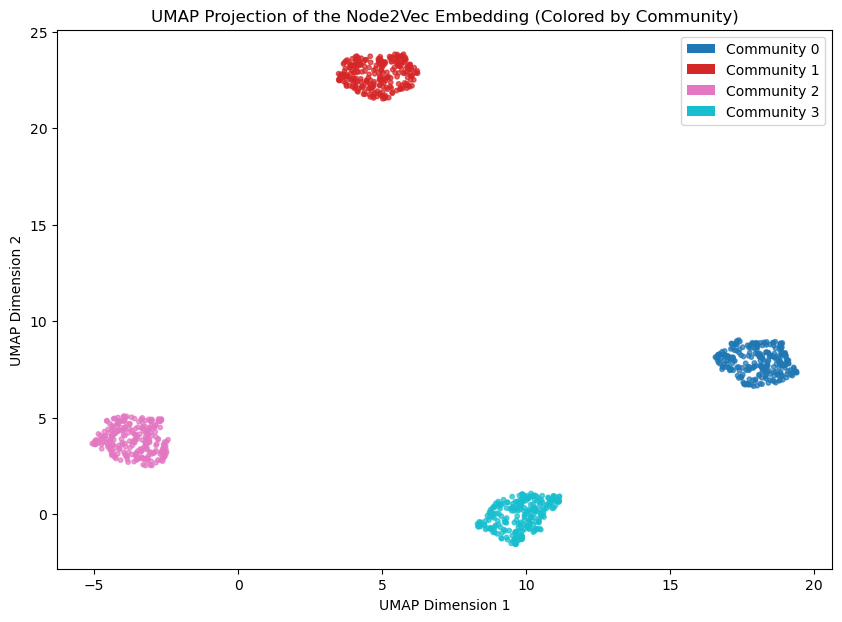

In [11]:
import umap
import numpy as np
import matplotlib.pyplot as plt

def plot_umap_with_communities(embedding, community_labels):
    # Step 1: Apply UMAP to reduce the dimensionality to 2D
    reducer = umap.UMAP(n_components=2, random_state=42)
    embedding_2d = reducer.fit_transform(embedding)

    # Step 2: Get unique communities and assign colors
    unique_communities = set(community_labels.values())
    colors = plt.cm.get_cmap('tab10', len(unique_communities))
    
    # Create a color mapping for each node based on its community
    node_colors = [colors(community_labels[node]) for node in range(len(embedding))]

    # Step 3: Plot the 2D UMAP projection with community coloring
    plt.figure(figsize=(10, 7))
    plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=node_colors, s=10, alpha=0.7)
    plt.title('UMAP Projection of the Node2Vec Embedding (Colored by Community)')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')

    # Add legend for each community
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=colors(i), label=f'Community {i}') for i in unique_communities]
    plt.legend(handles=legend_elements, loc='best')

    plt.show()

plot_umap_with_communities(emb, community_labels)


We can see that they are well separated. Let's look at the pairwise angular distance matrix for the coordinates in the hyperbolic and node2vec embedding spaces, and see how similar they are

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity_node2vec = cosine_similarity(emb)

In [13]:
# Step 2: Calculate cosine similarity for hyperbolic embedding using theta
theta = data['theta']
n = len(theta)

# Create an empty matrix for the cosine similarity
cosine_similarity_hyperbolic = np.zeros((n, n))

# Fill the cosine similarity matrix
for i in range(n):
    for j in range(n):
        cosine_similarity_hyperbolic[i, j] = np.cos(theta[i] - theta[j]) # pi - |pi - |deltaij| | 

# Output the cosine similarity matrices
print("Cosine Similarity Matrix for Node2Vec Embedding:")
print(cosine_similarity_node2vec)

print("\nCosine Similarity Matrix for Hyperbolic Embedding:")
print(cosine_similarity_hyperbolic)

Cosine Similarity Matrix for Node2Vec Embedding:
[[1.         0.98080923 0.97844887 ... 0.28528927 0.26690897 0.38287527]
 [0.98080923 1.         0.99173509 ... 0.31689898 0.30947654 0.42980938]
 [0.97844887 0.99173509 1.         ... 0.32220548 0.31532937 0.43345418]
 ...
 [0.28528927 0.31689898 0.32220548 ... 1.         0.98624555 0.97524702]
 [0.26690897 0.30947654 0.31532937 ... 0.98624555 1.         0.97567677]
 [0.38287527 0.42980938 0.43345418 ... 0.97524702 0.97567677 1.        ]]

Cosine Similarity Matrix for Hyperbolic Embedding:
[[ 1.          0.97501898  0.88949853 ... -0.99423254 -0.8880856
  -0.8936944 ]
 [ 0.97501898  1.          0.76578212 ... -0.94557393 -0.76379585
  -0.9710297 ]
 [ 0.88949853  0.76578212  1.         ... -0.93337309 -0.99999523
  -0.5899229 ]
 ...
 [-0.99423254 -0.94557393 -0.93337309 ...  1.          0.93226224
   0.84042144]
 [-0.8880856  -0.76379585 -0.99999523 ...  0.93226224  1.
   0.58743072]
 [-0.8936944  -0.9710297  -0.5899229  ...  0.84042144 

In [14]:
import numpy as np
from scipy.stats import pearsonr, spearmanr


from scipy.spatial import procrustes

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def center_embeddings(V):
    # Subtract the mean of each column from the corresponding entries
    return V - np.mean(V, axis=0)

def calculate_normalized_embedding_loss(V_a, V_b):
    # Step 1: Center both embedding matrices
    V_a_centered = center_embeddings(V_a)
    V_b_centered = center_embeddings(V_b)
    
    # Step 2: Calculate cosine similarity matrices for centered embeddings
    C_a = cosine_similarity(V_a_centered)
    C_b = cosine_similarity(V_b_centered)
    
    # Step 3: Calculate the absolute differences between cosine similarities
    N = V_a.shape[0]
    loss = 0
    
    # Only sum over the upper triangular part of the matrix (i < j)
    for i in range(N):
        for j in range(i+1, N):
            loss += np.abs(C_a[i, j] - C_b[i, j])
    
    # Step 4: Normalize the loss
    normalized_loss = (2 / (N * (N - 1))) * loss
    
    return normalized_loss

# Example usage:
theta = data['theta']  # Converting theta into x,y coordinates on disk of radius 1

Vh = np.column_stack((np.cos(theta), np.sin(theta))) # This is already centred, so we don't have to worry
Vn = center_embeddings(emb)

loss = calculate_normalized_embedding_loss(Vh, Vn)



# Assume embedding_1 and embedding_2 are the original embeddings, not the cosine matrices
mtx1, mtx2, disparity = procrustes(cosine_similarity_node2vec, cosine_similarity_hyperbolic)

# Step 1: Flatten the upper triangular part of both matrices (since they are symmetric)
indices = np.triu_indices_from(cosine_similarity_node2vec, k=1)
matrix_1_flat = cosine_similarity_node2vec[indices]
matrix_2_flat = cosine_similarity_hyperbolic[indices]

# Step 2: Compute Pearson correlation between the two flattened matrices
pearson_corr, _ = pearsonr(matrix_1_flat, matrix_2_flat)

# Compute Spearman correlation as well (optional)
spearman_corr, _ = spearmanr(matrix_1_flat, matrix_2_flat)
frobenius_norm = np.linalg.norm(cosine_similarity_node2vec - cosine_similarity_hyperbolic, ord='fro')
print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

print(f"Procrustes Disparity: {disparity}") # smaller is better aligned
print(f"Normalized Embedding Loss: {loss}")

Pearson Correlation: 0.7288576743492119
Spearman Correlation: 0.5767412064200093
Procrustes Disparity: 0.4067760224273083
Normalized Embedding Loss: 0.38237737441038105


In [1]:
# Correlation for length

In [ ]:
hype_dists = data['radius']
n2v_dists  = np.linalg.norm(emb,axis=1)

In [31]:
pearson_corr, _ = pearsonr(hype_dists, n2v_dists)
spearman_corr, _ = spearmanr(hype_dists, n2v_dists)
print(f"Pearson Correlation: {pearson_corr}")
print(f"Spearman Correlation: {spearman_corr}")

Pearson Correlation: 0.19723346425479288
Spearman Correlation: 0.174398540491323


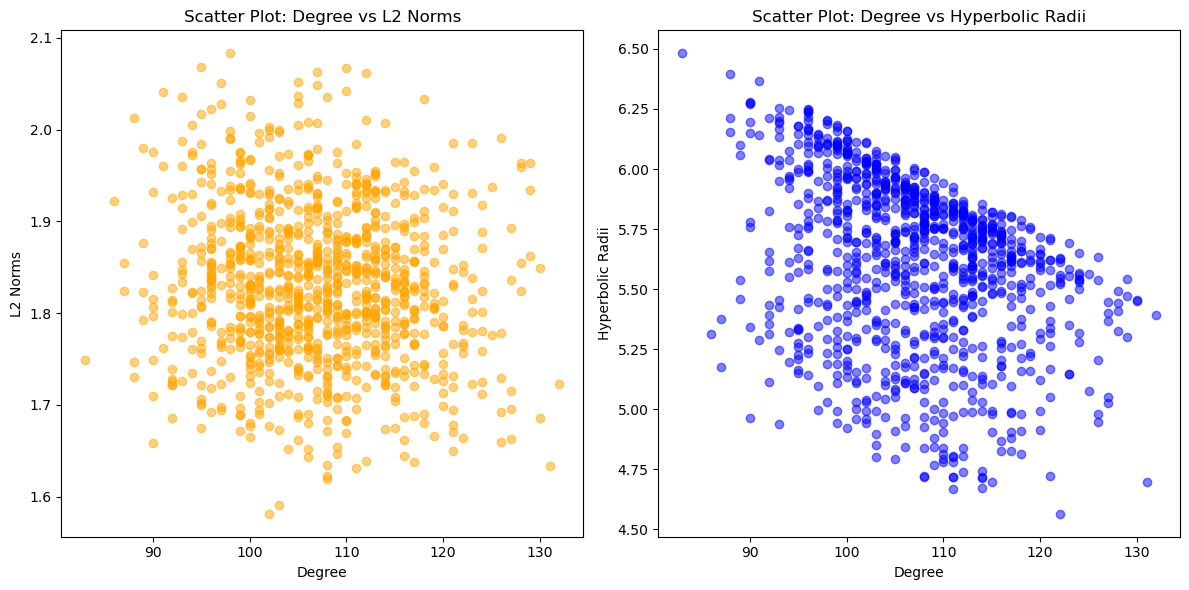

In [54]:
degrees = [i[1] for i in (nx.degree(G))]

# Generate some example degree data for the scatter plot (replace with actual data)
# Create the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for degrees vs n2v_dists
ax1.scatter(degrees, n2v_dists, alpha=0.5, color='orange')
ax1.set_xlabel('Degree')
ax1.set_ylabel('L2 Norms')
ax1.set_title('Scatter Plot: Degree vs L2 Norms')

# Scatter plot for degrees vs hype_dists
#ax2.set_yscale("log")
ax2.scatter(degrees, hype_dists, alpha=0.5, color='blue')
ax2.set_xlabel('Degree')
ax2.set_ylabel('Hyperbolic Radii')
ax2.set_title('Scatter Plot: Degree vs Hyperbolic Radii')

# Display the plot
plt.tight_layout()
plt.show()


## Angular Synchronization

True angles: [2.35330497 5.97351416 4.59925358 3.76148219 0.98029403 0.98014248
 0.3649501  5.44234523 3.77691701 4.44895122]
Estimated angles: [ 3.1391345   0.51240342 -0.85175256 -1.69712841  1.85155335  1.79757791
  1.2257252   0.03119839 -1.64633923 -0.93926282]
Optimal offset: -0.844107573905098
Aligned estimated angles: [2.29502692 5.95148115 4.58732517 3.74194932 1.00744578 0.95347034
 0.38161762 5.47027612 3.7927385  4.49981492]


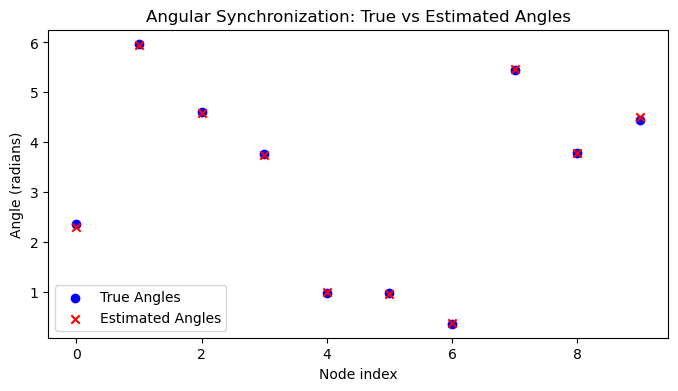